<a href="https://colab.research.google.com/github/ChotepipatC/DADS5001_Excercise/blob/main/Chipotle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')
chipo['item_price'] = chipo['item_price'].str.replace('$', '', regex=False).astype(float)
chipo


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


เมนูไหนขายได้ดีสุด**

In [ ]:
top_items = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
print(top_items)


item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chicken Crispy Tacos                      50


In [ ]:
order_total = chipo.groupby('order_id')['item_price'].sum()
average_order_total = order_total.mean()
print(f"ค่าเฉลี่ยยอดใช้จ่ายต่อคำสั่งซื้อ: ${average_order_total:.2f}")

ค่าเฉลี่ยยอดใช้จ่ายต่อคำสั่งซื้อ: $18.81


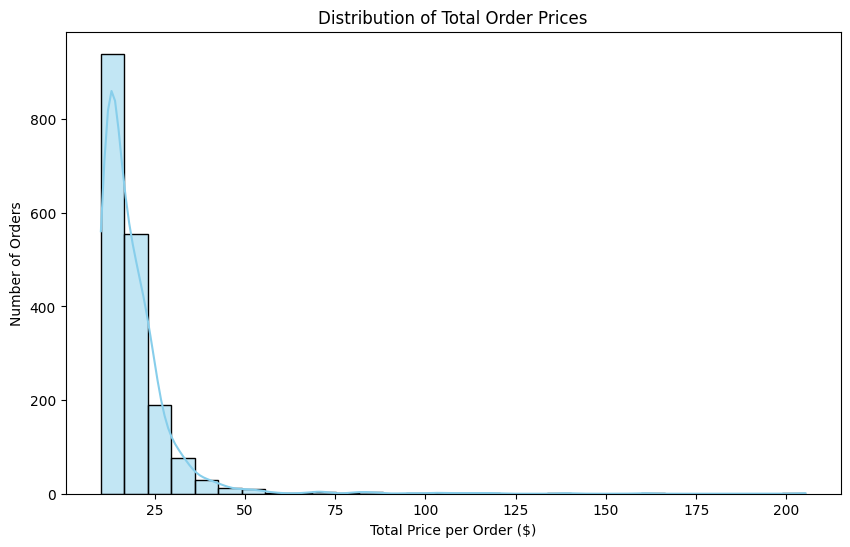

In [ ]:
import plotly.express as px

# ข้อมูลเดิม order_total (Series)
order_total = chipo.groupby('order_id')['item_price'].sum().reset_index()

# วาดกราฟ
fig = px.histogram(order_total, x='item_price', nbins=30,
                   title='Distribution of Total Order Prices',
                   labels={'item_price': 'Total Price per Order ($)'},
                   template='plotly_dark')
fig.show()


In [31]:
top_items = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
print(top_items)


item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chicken Crispy Tacos                      50


In [32]:
order_total = chipo.groupby('order_id')['item_price'].sum()
average_order_total = order_total.mean()
print(f"ค่าเฉลี่ยยอดใช้จ่ายต่อคำสั่งซื้อ: ${average_order_total:.2f}")

ค่าเฉลี่ยยอดใช้จ่ายต่อคำสั่งซื้อ: $18.81


In [34]:
top_items = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
print(top_items)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chicken Crispy Tacos                      50


In [35]:
import plotly.express as px


top_10_df = top_items.reset_index()
top_10_df.columns = ['item_name', 'quantity']

fig = px.bar(top_10_df,
             x='item_name',
             y='quantity',
             title='Top 10 Most Ordered Items',
             labels={'item_name': 'Item Name', 'quantity': 'Total Quantity'},
             color='quantity',
             text='quantity')

fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [36]:
# สร้าง order_total และช่วงราคา
order_total = chipo.groupby('order_id')['item_price'].sum().reset_index()

bins = [5, 15, 25, 35, 45, 50, float('inf')]
labels = ['5-14.99', '15-24.99', '25-34.99', '35-44.99', '45-49.99', '>=50']

order_total['price_range'] = pd.cut(order_total['item_price'], bins=bins, labels=labels, right=False)
order_total = order_total.dropna(subset=['price_range'])

# วาดกราฟ histogram แบบมีสี
fig = px.histogram(order_total,
                   x='price_range',
                   color='price_range',  # เพิ่มสีตาม price_range
                   title='Order Total Price by Defined Ranges',
                   labels={'price_range': 'Total Price Range ($)', 'count': 'Number of Orders'},
                   template='plotly_dark',
                   color_discrete_sequence=px.colors.qualitative.Set2)  # เลือกชุดสี

# จัดเรียงแกน x ตามลำดับช่วง
fig.update_layout(xaxis_categoryorder='array', xaxis_categoryarray=labels)

fig.show()

In [37]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)  # ซ่อน DeprecationWarning ชั่วคราว

from mlxtend.frequent_patterns import apriori, association_rules
import plotly.graph_objects as go
import networkx as nx

# เตรียมข้อมูล Basket (one-hot encoding) เป็น boolean DataFrame
basket = chipo.groupby(['order_id', 'item_name'])['quantity'].sum().unstack().fillna(0)
basket = basket > 0  # แปลงเป็น bool เพื่อหลีกเลี่ยง warning

# หา Frequent Itemsets ด้วย minimum support 1%
frequent_items = apriori(basket, min_support=0.01, use_colnames=True)

# หา Association Rules โดยใช้ metric lift และ confidence ที่กำหนด
rules = association_rules(frequent_items, metric='lift', min_threshold=1.0)
rules = rules[(rules['confidence'] > 0.4) & (rules['lift'] > 1.2)]

# สร้างกราฟ directed graph ด้วย networkx
G = nx.DiGraph()
for _, row in rules.iterrows():
    for ant in row['antecedents']:
        for con in row['consequents']:
            G.add_edge(ant, con, weight=row['confidence'])

# สร้าง layout สำหรับกราฟ
pos = nx.spring_layout(G, k=0.5, seed=42)

# เตรียมข้อมูล edges สำหรับ plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines')

# เตรียมข้อมูล nodes สำหรับ plotly
node_x = []
node_y = []
node_text = []
node_sizes = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    # กำหนดขนาดโหนดตามจำนวน connection (degree)
    node_sizes.append(10 + 5 * len(list(G.adj[node])))

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=node_sizes,
        color=node_sizes,
        colorbar=dict(
            thickness=15,
            title='Number of Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2),
    text=node_text,
    textposition="bottom center"
)

# สร้าง layout และแสดงกราฟ
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Interactive Graph of Frequently Ordered Items',
                titlefont_size=20,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



Q2: แต่ละออเดอร์สั่งเฉลี่ยกี่อย่าง กี่ดอลลาร์

In [10]:
# ก่อนอื่นต้องคำนวณ 'total_price' = quantity * item_price ในแต่ละแถว
# จากนั้นจึง Groupby
order_summary = chipo.groupby('order_id').agg(
    distinct_items=('item_name', 'nunique'), # จำนวน item_name ที่ไม่ซ้ำกัน
    total_quantity=('quantity', 'sum'),      # ผลรวมของ quantity
    total_price=('item_price', 'sum')        # ผลรวมของ item_price
).reset_index()

In [11]:
order_summary.head()

,order_id,distinct_items,total_quantity,total_price
0,1,4,4,11.56
1,2,1,2,16.98
2,3,2,2,12.67
3,4,2,2,21.00
4,5,2,2,13.70


In [16]:
import plotly.express as px


fig = px.box(order_summary,
                x='total_quantity',
                hover_name='order_id',
                title='Quantity per order distribution')
                #points="all") #default is the outlier
fig.show()

In [23]:

fig = px.box(order_summary,
                x='total_price',
                hover_name='order_id',
                title='Price distribution')
                #points="all") #default is the outlier
fig.show()

In [30]:
fig = px.scatter(order_summary,
             x = 'total_quantity',
                y='total_price',
                #hover_name='order_id',
                #color = 'shelf',
                #size = 'cups',
                #hover_data=['calories','carbo','protein'],
                hover_name= "Order ID : " + order_summary['order_id'].astype(str),
                title='Price and quantity relation')
fig.show()